In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

In [2]:
model = load_model('house_image_model.keras')

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
predict_images = tf.keras.preprocessing.image_dataset_from_directory(
    'Data\To_predict',
    batch_size = 6,
    labels = None,
    shuffle = False,
    image_size = (256, 256),
    crop_to_aspect_ratio = True
)

Found 6 files.


In [4]:
for img in predict_images.take(1):
    print(img.shape)

(6, 256, 256, 3)


In [5]:
predictions = model.predict(predict_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


In [6]:
predictions

array([[6.1875809e-04, 8.0595058e-08, 9.9826705e-01, 1.1139882e-03],
       [1.9536614e-11, 2.8624518e-11, 2.4154360e-05, 9.9997580e-01],
       [2.3125617e-06, 4.6669605e-08, 1.3013812e-02, 9.8698390e-01],
       [7.2855987e-02, 1.6347591e-02, 7.3872083e-01, 1.7207561e-01],
       [4.2784330e-01, 6.0432977e-03, 3.6495826e-01, 2.0115519e-01],
       [1.0008272e-01, 6.9138199e-01, 1.9162852e-01, 1.6906783e-02]],
      dtype=float32)

In [7]:
class_names = ['pantry', 'bathroom', 'indoor', 'outdoor']

predicted_classes = np.argmax(predictions, axis=1)
confidence_scores = np.max(predictions, axis=1)

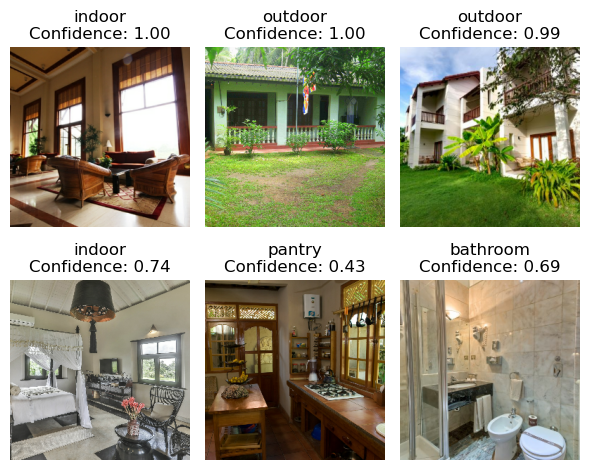

In [8]:
for images in predict_images.take(1):
    plt.figure(figsize=(6, 5))  # Adjust the figure size if needed
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
        predicted_label = class_names[predicted_classes[i]]
        plt.title(f'{predicted_label}\nConfidence: {confidence_scores[i]:.2f}')
    plt.tight_layout()
    plt.savefig('predictions.png')
    plt.show()